## Google Big Query: Ethereum

### References
* https://www.youtube.com/watch?v=-cRXSpYCW3g
* https://rspraneethkumar.medium.com/accessing-google-big-query-from-jupyter-notebook-878145ce37dc
* https://cloud.google.com/docs/authentication/getting-started#auth-cloud-implicit-python
* https://console.cloud.google.com/welcome?project=ethereum-query-358219
* https://ethereum.stackexchange.com/questions/76815/i-want-the-full-list-of-ethereum-smart-contracts-whose-balances-increased-by-100
* https://github.com/blockchain-etl/awesome-bigquery-views#every-ethereum-balance-on-every-day

In [36]:

PROJECT_ID = 'ethereum-query-358219'

In [37]:
import os
cwd =  os.getcwd().replace("/notebooks/","/resources")
cwd = '/Users/ian_moore/opt/syscoin'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=cwd+JSON_CREDENTIALS

In [41]:
#print(os.environ['GOOGLE_APPLICATION_CREDENTIALS'])

In [39]:
from google.cloud import bigquery
client = bigquery.Client()

In [40]:
sql = """
SELECT DATE_TRUNC(DATE(transactions.block_timestamp), MONTH) AS tx_month, COUNT(*) AS tx_count
FROM `bigquery-public-data.ethereum_blockchain.transactions` AS transactions
WHERE DATE(transactions.block_timestamp) > DATE('2015-07-31') and DATE(transactions.block_timestamp) < DATE('2018-09-01')
GROUP BY tx_month
ORDER by tx_month ASC
"""
df = client.query(sql, project=PROJECT_ID).to_dataframe()

<AxesSubplot:title={'center':'Ethereum Monthly Tx Count'}, xlabel='tx_month'>

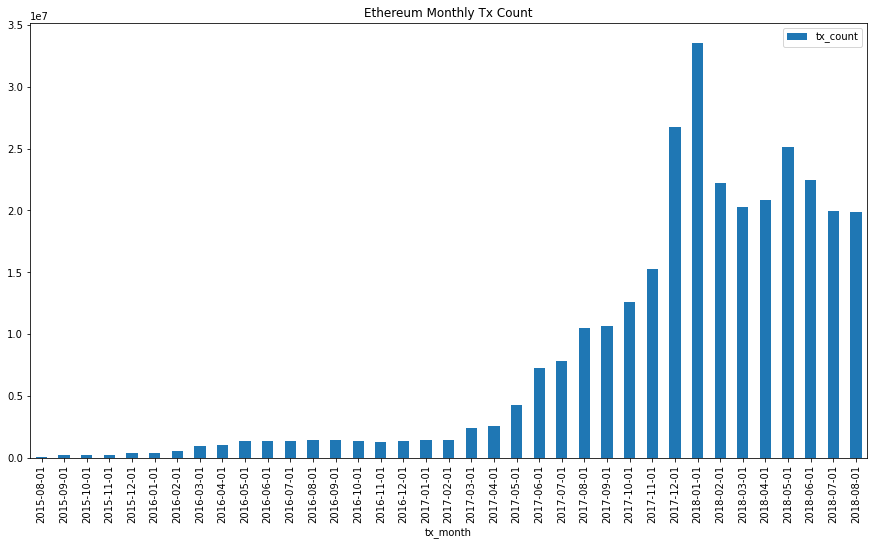

In [17]:
df.plot(kind='bar', x='tx_month', y='tx_count',title='Ethereum Monthly Tx Count', figsize=(15,8))

In [19]:
sql = """SELECT *
FROM  `bigquery-public-data.crypto_ethereum.traces`
WHERE DATE(block_timestamp) = "2021-02-12" 
        and trace_address IS NOT NULL
        and block_number = 11838934
        and value > 0
ORDER BY transaction_index
"""
df = client.query(sql, project=PROJECT_ID).to_dataframe()

In [21]:
df.head(25)

,transaction_hash,transaction_index,from_address,to_address,value,input,output,trace_type,call_type,reward_type,gas,gas_used,subtraces,trace_address,error,status,block_timestamp,block_number,block_hash,trace_id
0,0x6dfea564e437534a36c328bf3e4420a9f932e23bc2ad...,0,0x121effb8160f7206444f5a57d13c7a4424a237a4,0x8f1a69e1ec219fa1fdfa3c89dd74270bb59bfcfe,100000000000000000.000000000,0x,0x,call,call,None,46901,0,0,"0,0",None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0x6dfea564e437534a36c328bf3e4420a9f932e23...
1,0xfb3392f02add9fee84cd352ccc94d773dbe3fe1c2db9...,49,0x7b596c8f1b4db131503eb4f4a06f81c99d47dae1,0x7e18ff42e99a890d0f54770e90d24801613f5832,32006634000000000.000000000,0x,0x,call,call,None,102300,2083,0,0,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xfb3392f02add9fee84cd352ccc94d773dbe3fe1...
2,0xb7d8fc4332373f7df6f8db128ffa11476727040e864f...,58,0x000000cce580fb2b76b2d1196c237db199d82505,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13977100000000000000.000000000,0xd0e30db0,0x,call,call,None,335986,22674,0,"0,0",None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xb7d8fc4332373f7df6f8db128ffa11476727040...
3,0xb7d8fc4332373f7df6f8db128ffa11476727040e864f...,58,0x0000006daea1723962647b7e189d311d757fb793,0x000000cce580fb2b76b2d1196c237db199d82505,13977100000000000000.000000000,0x8743ad58000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,call,call,None,351924,192246,6,0,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xb7d8fc4332373f7df6f8db128ffa11476727040...
4,0xd9b8b6755631a70bec7fd786273c72653bed22b5fd98...,66,0x2602669a92fccf44e5319ff51b0f453aab9db021,0x049b8d99bae2de7df933933e1ac483bf3a97dc73,20000000000000000.000000000,0x,0x,call,call,None,2300,0,0,52,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xd9b8b6755631a70bec7fd786273c72653bed22b...
5,0xd9b8b6755631a70bec7fd786273c72653bed22b5fd98...,66,0x2602669a92fccf44e5319ff51b0f453aab9db021,0x99737bfdf1180986fc98e739542cde559c4855cb,20000000000000000.000000000,0x,0x,call,call,None,2300,0,0,57,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xd9b8b6755631a70bec7fd786273c72653bed22b...
6,0xd9b8b6755631a70bec7fd786273c72653bed22b5fd98...,66,0x2602669a92fccf44e5319ff51b0f453aab9db021,0x0f5bc5e6da2235ceb43a6719a34ab6c70fee560c,20000000000000000.000000000,0x,0x,call,call,None,2300,0,0,19,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xd9b8b6755631a70bec7fd786273c72653bed22b...
7,0xd9b8b6755631a70bec7fd786273c72653bed22b5fd98...,66,0x2602669a92fccf44e5319ff51b0f453aab9db021,0x7f5a06a68ead8944c6ec3c33cbabd0ad1fead647,20000000000000000.000000000,0x,0x,call,call,None,2300,0,0,75,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xd9b8b6755631a70bec7fd786273c72653bed22b...
8,0xd9b8b6755631a70bec7fd786273c72653bed22b5fd98...,66,0x2602669a92fccf44e5319ff51b0f453aab9db021,0x25652cdafe6929bc7016fb070d9abf90a160c136,20000000000000000.000000000,0x,0x,call,call,None,2300,0,0,62,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xd9b8b6755631a70bec7fd786273c72653bed22b...
9,0xd9b8b6755631a70bec7fd786273c72653bed22b5fd98...,66,0x2602669a92fccf44e5319ff51b0f453aab9db021,0x6751cc8c9f8e0cabb4d5dd30ed4eeb5dd281ce4c,20000000000000000.000000000,0x,0x,call,call,None,2300,0,0,34,None,1,2021-02-12 01:45:22+00:00,11838934,0x8c2043ce3deb2b9fa57c7ced5150a3ef26772f7cb901...,call_0xd9b8b6755631a70bec7fd786273c72653bed22b...
